In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
from scipy import stats
import warnings
import os
import folium
import json
warnings.filterwarnings('ignore')

In [2]:
#Loading the data and doing some basic preprocessing
DATA_PATH = "data/"
AFDB_2019 = "Data.csv"
db_zero_all_dates = pd.read_csv(DATA_PATH + AFDB_2019, sep=',')

INDICATORS = "Indicator.csv"
inds = pd.read_csv(DATA_PATH + INDICATORS, sep=',')

print(db_zero_all_dates.shape)
db_zero_all_dates.dropna(subset=['Date', 'Value','Country','Indicator'],inplace = True) 
#Uses 'any' by default in "how" argument, which concludes our rows are good, when shape (nb of rows here) is same.
print(db_zero_all_dates.shape)


db_zero_all_dates.Date = db_zero_all_dates.Date.apply(lambda x : x.split("-")[0]).astype(int)
db_zero_all_dates.rename(columns = {'Date':'Year'}, inplace = True)
db_zero_all_dates.Scale = db_zero_all_dates.Scale.astype(int)
db_zero_all_dates.Value = db_zero_all_dates.Value.astype(float)
db_zero_all_dates.head()

(2792569, 9)
(2792569, 9)


,CountryName,Country,IndicatorName,Indicator,Units,Scale,Frequency,Year,Value
0,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2000,9.133374
1,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2001,8.535367
2,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2002,7.238168
3,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2003,7.217622
4,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2004,7.373657


In [3]:
db_zero_all_dates.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050], dtype=int64)

In [4]:
#drop all rows with year > 2019
db_zero = db_zero_all_dates[db_zero_all_dates.Year < 2020]
print(db_zero_all_dates.shape)
db_zero.shape

(2792569, 9)


(2772197, 9)

In [5]:
db = pd.pivot_table(db_zero, values='Value', index=['Country','Year'], columns=['Indicator'])
db

Indicator     AFDB_CPIA_EM_DB_S  AFDB_CPIA_EM_FP_S  AFDB_CPIA_EM_MM_S  \
Country Year                                                            
ADB     1960                NaN                NaN                NaN   
        1961                NaN                NaN                NaN   
        1962                NaN                NaN                NaN   
        1963                NaN                NaN                NaN   
        1964                NaN                NaN                NaN   
...                         ...                ...                ...   
ZZM     2015                NaN                NaN                NaN   
        2016                NaN                NaN                NaN   
        2017                NaN                NaN                NaN   
        2018                NaN                NaN                NaN   
        2019                NaN                NaN                NaN   

Indicator     AFDB_CPIA_EM_S  AFDB_CPIA_IRI_ID_S  AFDB_CPIA_IRI_RI_S  \
Country Year                                                           
ADB     1960             NaN                 NaN                 NaN   
        1961             NaN                 NaN                 NaN   
        1962             NaN                 NaN                 NaN   
        1963             NaN                 NaN                 NaN   
        1964             NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
ZZM     2015             NaN                 NaN                 NaN   
        2016             NaN                 NaN                 NaN   
        2017             NaN                 NaN                 NaN   
        2018             NaN                 NaN                 NaN   
        2019             NaN                 NaN                 NaN   

Indicator     AFDB_CPIA_N  AFDB_CPIA_PSIE_BHR_S  AFDB_CPIA_PSIE_EPRU_S  \
Country Year                                                             
ADB     1960          NaN                   NaN                    NaN   
        1961          NaN                   NaN                    NaN   
        1962          NaN                   NaN                    NaN   
        1963          NaN                   NaN                    NaN   
        1964          NaN                   NaN                    NaN   
...                   ...                   ...                    ...   
ZZM     2015          NaN                   NaN                    NaN   
        2016          NaN                   NaN                    NaN   
        2017          NaN                   NaN                    NaN   
        2018          NaN                   NaN                    NaN   
        2019          NaN                   NaN                    NaN   

Indicator     AFDB_CPIA_PSIE_EPR_S  ...  TG.WEO.TXGXO_R.KD  TG.WEO.TXG_D.WD  \
Country Year                        ...                                       
ADB     1960                   NaN  ...                NaN              NaN   
        1961                   NaN  ...                NaN              NaN   
        1962                   NaN  ...                NaN              NaN   
        1963                   NaN  ...                NaN              NaN   
        1964                   NaN  ...                NaN              NaN   
...                            ...  ...                ...              ...   
ZZM     2015                   NaN  ...                NaN              NaN   
        2016                   NaN  ...                NaN              NaN   
        2017                   NaN  ...                NaN              NaN   
        2018                   NaN  ...                NaN              NaN   
        2019                   NaN  ...                NaN              NaN   

Indicator     TG.WEO.TXG_R.KD  TG.WEO.TXG_R.ZG  TG.WEO.TXS.CD  TG.WEO.TX_D.WD  \
Country Year                             

In [6]:
db_verif = db.dropna(how='all')
db_verif.shape
#Still, no key(country,year) has all nans, each key has its indicators (getting the same shape)

(6502, 1279)

In [7]:
def lowercase_all(text):
    return text.lower()

In [8]:
education_keywords = ['education','literacy','enrol','school','teach','pupil','stud','repeat',
                      'test','search','grade','intern','knowledge','lab','read','prof','write','report','skill']

'''
['university','department','degree','learn','college','academic','assessment','class','course','curriculum','exam',
'faculty','instruct','intellect','language','quizz', ..etc] 
These keywords and many others didn't add a single row to the result, Hence we discarded them.
We have chosen these keywords based on the data examined manually to look a bit what we are dealing with, and from well known
education related dictionaries.
'''

inds_education = inds[inds.Name.apply(lowercase_all).str.contains('|'.join(education_keywords))]
inds_education

,Order,Name,Parent,Code,Indicator_Id,Source_Note,Derivation_Rule,IsDerived,Weights_Indicator,Aggregation_Rule,Unit
31,32,Internet users per 100 inhabitants,KN.B5,IT.NET.USER.P3,9.0,Internet users refers to the number of people ...,(('IT.NET.USER'/ 'SP.POP.TOTL' )*100),1.0,NaN,DERIVE(('IT.NET.USER'/ 'SP.POP.TOTL' )*100),per 100 inhabitants
32,33,Proportion of individuals using the Internet,KN.B5,IT.USE.ii99,1730.0,Proportion of individuals using the Internet i...,NaN,0.0,NaN,NaN,NaN
42,43,Internet users,KN.B5,IT.NET.USER,482.0,Internet users refers to the number of people ...,NaN,0.0,NaN,NaN,NaN
43,44,Internet Subscribers,KN.B5,IT.NET.SCRB,911.0,'Internet subscribers refers to the number of ...,NaN,0.0,NaN,NaN,NaN
46,47,Fixed Internet broadband Subscriptions per 100...,KN.B5,IT.NET.BBND,1706.0,"Fixed Internet broadband subscriptions, by spe...",NaN,0.0,NaN,NaN,per 100 inhabitants
...,...,...,...,...,...,...,...,...,...,...,...
1637,1638,Teaching staff at third level - Total (number),KN.B14,CTRY.SE.TCHR.THIRD,1879.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number
1638,1639,Third level student enrollment - Female (number),KN.B14,CTRY.SE.TER.ENRR.FE.TOT,1792.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number
1639,1640,Third level student enrollment - Total (number),KN.B14,CTRY.SE.TER.ENRR.TOT,1793.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number
1640,1641,Public expenditure on education (% of budget),KN.B14,CTRY.SE.XPD.BUDG.ZS,1880.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,% of budget


In [9]:
education_codes = inds_education.Code.unique().tolist()
db_education = db_zero[db_zero.Indicator.str.match('|'.join(education_codes))]
db_education

,CountryName,Country,IndicatorName,Indicator,Units,Scale,Frequency,Year,Value
399,AFRICA,AFR,Internet users per 100 inhabitants,IT.NET.USER.P3,per 100 inhabitants,1,A,1991,0.000737
400,AFRICA,AFR,Internet users per 100 inhabitants,IT.NET.USER.P3,per 100 inhabitants,1,A,1992,0.002143
401,AFRICA,AFR,Internet users per 100 inhabitants,IT.NET.USER.P3,per 100 inhabitants,1,A,1993,0.006324
402,AFRICA,AFR,Internet users per 100 inhabitants,IT.NET.USER.P3,per 100 inhabitants,1,A,1994,0.014261
403,AFRICA,AFR,Internet users per 100 inhabitants,IT.NET.USER.P3,per 100 inhabitants,1,A,1995,0.040432
...,...,...,...,...,...,...,...,...,...
2792095,ADF 13 Non Fragile,ADF13NF,Labour force participation (as % of total),AG.POP.EAC.TOT.ZS,as % of Total,1,A,2015,40.107127
2792096,ADF 13 Non Fragile,ADF13NF,Labour force participation (as % of total),AG.POP.EAC.TOT.ZS,as % of Total,1,A,2016,40.308941
2792097,ADF 13 Non Fragile,ADF13NF,Labour force participation (as % of total),AG.POP.EAC.TOT.ZS,as % of Total,1,A,2017,40.535585
2792098,ADF 13 Non Fragile,ADF13NF,Labour force participation (as % of total),AG.POP.EAC.TOT.ZS,as % of Total,1,A,2018,40.782341


In [10]:
db_ed = pd.pivot_table(db_education, values='Value', index=['Country', 'Year'], columns=['Indicator'])

#thresh=N requires that a column has at least N non-NaNs to survive
#We chose to work with an indicator if at least half of its values are not missing.

th = 0.5
print(db_ed.shape)
db_ed.dropna(axis=1,thresh=int(th*db_ed.shape[0]),inplace=True)
print(db_ed.shape)

(6351, 161)
(6351, 28)


Now it's time to check manually the description of the 28 selected attributes (indicators) to see if they are really
education-related, hence relevant for our study, or not.
Because until now the only filter we have done is selecting indicators with description containing one of those 
education-related keywords from above.

In [11]:
inds_educ_after_nan_codes = inds[inds.Code.str.match('|'.join(db_ed.columns))]
inds_educ_after_nan_codes = inds_educ_after_nan_codes[['Code','Name','Source_Note']]
inds_educ_after_nan_codes

,Code,Name,Source_Note
236,AG.POP.EAC.TOT.ZS,Labour force participation (as % of total),NaN
418,NY.GDP.PCAP.PP.CD,"GDP Per capita, PPP (current international $)",'GDP per capita based on purchasing power pari...
1242,FI.RES.TOTL.MO,Gross international reserves in months of imports,Gross international reserves expressed in mont...
1243,FI.RES.TOTL.CD,Gross international reserves (current US$),Gross international reserves comprise holdings...
1289,SE.PRM.ENRL.TC.ZS,"Pupil-teacher ratio, primary",Primary school pupil-teacher ratio is the numb...
1290,SE.PRM.ENRR,"School enrollment, primary (% gross)",Gross enrollment ratio is the ratio of total e...
1291,SE.PRM.ENRR.FE,"School enrollment, primary, female (% gross)",Gross enrollment ratio is the ratio of female ...
1292,SE.PRM.ENRR.MA,"School enrollment, primary, male (% gross)",Gross enrollment ratio is the ratio of male en...
1312,SE.YRS.SCHL.FE,"School Life Expectancy, female (year)",School life expectancy is defined as the total...
1469,SE.YRS.SCHL.MA,School Life Expectancy - Male (years),Male school life expectancy is defined as the ...


We see that the first 4 shown indicators, which are:

AG.POP.EAC.TOT.ZS   -    Labour force participation (as % of total)

NY.GDP.PCAP.PP.CD   -    GDP Per capita, PPP (current international D)

FI.RES.TOTL.MO      -    Gross international reserves in months of imports

FI.RES.TOTL.CD      -    Gross international reserves (current USD)

These have nothing to do with what we are looking for, they were only present because of the keywords : "lab" for the first
indicator when looking for potential description including a laboratory, and "intern" for the 3 others when looking 
for potential description including an intern student or an internship ..

Hence we can exclude these 4 indicators.

In [12]:
print(db_ed.shape)
db_ed = db_ed.drop(columns=['AG.POP.EAC.TOT.ZS','NY.GDP.PCAP.PP.CD','FI.RES.TOTL.MO','FI.RES.TOTL.CD'])
db_ed.shape

(6351, 28)


(6351, 24)

### Correlation plots between the education attributes

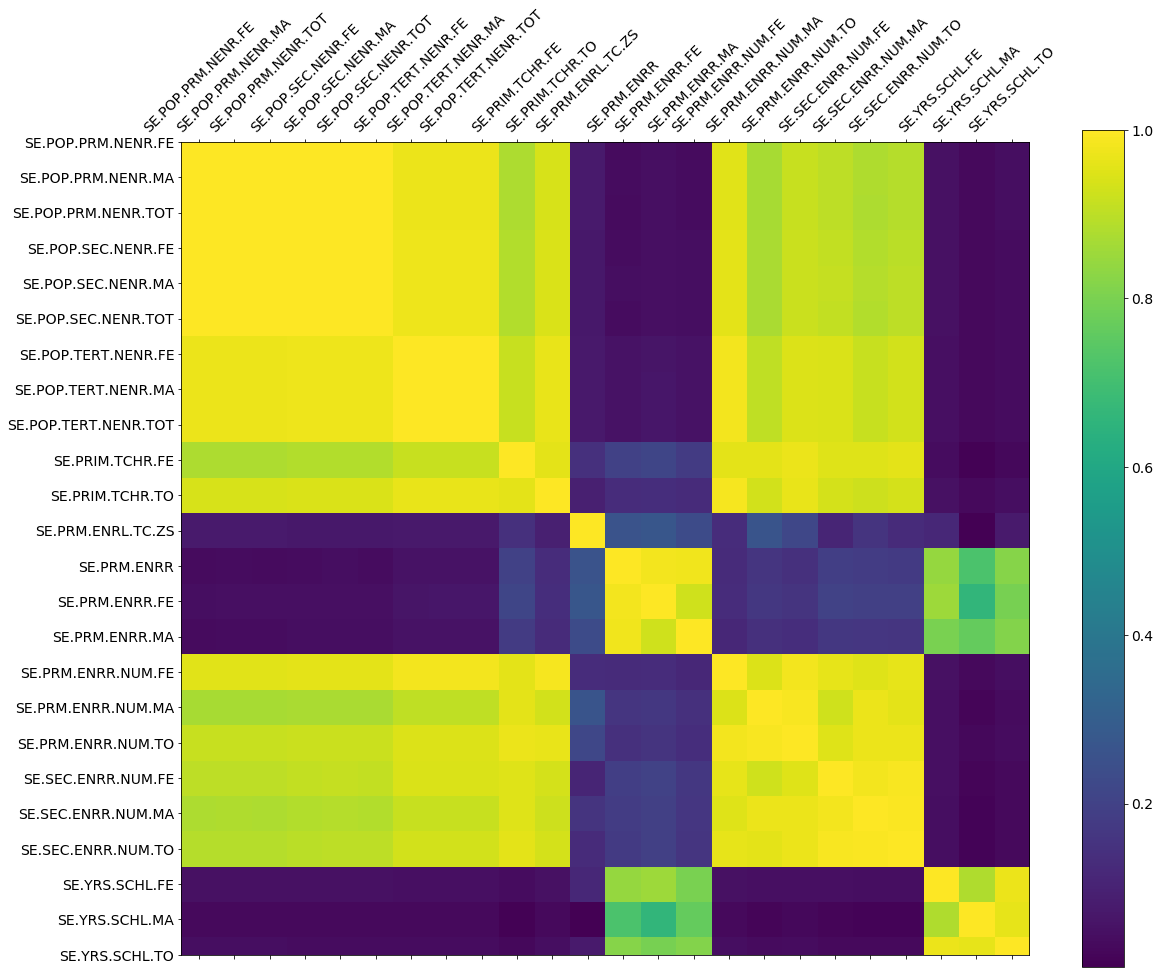

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(db_ed.corr(), fignum=f.number)
plt.xticks(range(db_ed.shape[1]), db_ed.columns, fontsize=14, rotation=45)
plt.yticks(range(db_ed.shape[1]), db_ed.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [14]:
corr = db_ed.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Indicator,SE.POP.PRM.NENR.FE,SE.POP.PRM.NENR.MA,SE.POP.PRM.NENR.TOT,SE.POP.SEC.NENR.FE,SE.POP.SEC.NENR.MA,SE.POP.SEC.NENR.TOT,SE.POP.TERT.NENR.FE,SE.POP.TERT.NENR.MA,SE.POP.TERT.NENR.TOT,SE.PRIM.TCHR.FE,SE.PRIM.TCHR.TO,SE.PRM.ENRL.TC.ZS,SE.PRM.ENRR,SE.PRM.ENRR.FE,SE.PRM.ENRR.MA,SE.PRM.ENRR.NUM.FE,SE.PRM.ENRR.NUM.MA,SE.PRM.ENRR.NUM.TO,SE.SEC.ENRR.NUM.FE,SE.SEC.ENRR.NUM.MA,SE.SEC.ENRR.NUM.TO,SE.YRS.SCHL.FE,SE.YRS.SCHL.MA,SE.YRS.SCHL.TO
Indicator,,,,,,,,,,,,,,,,,,,,,,,,
SE.POP.PRM.NENR.FE,1,1,1,0.999,0.999,0.999,0.972,0.972,0.972,0.877,0.94,0.0768,0.0361,0.0445,0.0364,0.955,0.871,0.916,0.901,0.879,0.89,0.0506,0.0321,0.0416
SE.POP.PRM.NENR.MA,1,1,1,1,1,1,0.972,0.972,0.972,0.879,0.94,0.0764,0.038,0.0464,0.0382,0.955,0.872,0.917,0.902,0.88,0.891,0.0506,0.0319,0.0415
SE.POP.PRM.NENR.TOT,1,1,1,1,0.999,1,0.972,0.972,0.972,0.878,0.94,0.0766,0.0371,0.0454,0.0373,0.955,0.871,0.916,0.902,0.88,0.891,0.0506,0.032,0.0416
SE.POP.SEC.NENR.FE,0.999,1,1,1,1,1,0.975,0.975,0.975,0.885,0.943,0.07,0.0399,0.0466,0.0422,0.959,0.875,0.92,0.91,0.887,0.899,0.0496,0.031,0.0406
SE.POP.SEC.NENR.MA,0.999,1,0.999,1,1,1,0.975,0.975,0.975,0.885,0.943,0.0689,0.0417,0.0485,0.044,0.959,0.876,0.92,0.911,0.887,0.899,0.0496,0.0308,0.0405
SE.POP.SEC.NENR.TOT,0.999,1,1,1,1,1,0.975,0.975,0.975,0.885,0.943,0.0694,0.0408,0.0475,0.0431,0.959,0.875,0.92,0.911,0.887,0.899,0.0496,0.0309,0.0405
SE.POP.TERT.NENR.FE,0.972,0.972,0.972,0.975,0.975,0.975,1,1,1,0.917,0.967,0.074,0.0544,0.0639,0.0537,0.984,0.904,0.949,0.943,0.918,0.932,0.0484,0.03,0.0395
SE.POP.TERT.NENR.MA,0.972,0.972,0.972,0.975,0.975,0.975,1,1,1,0.918,0.967,0.0726,0.0562,0.0656,0.0557,0.984,0.905,0.949,0.944,0.918,0.933,0.0484,0.0298,0.0393
SE.POP.TERT.NENR.TOT,0.972,0.972,0.972,0.975,0.975,0.975,1,1,1,0.917,0.967,0.0733,0.0553,0.0648,0.0547,0.984,0.905,0.949,0.943,0.918,0.933,0.0484,0.0299,0.0394


In [15]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['SE.POP.PRM.NENR.MA',
 'SE.POP.PRM.NENR.TOT',
 'SE.POP.SEC.NENR.FE',
 'SE.POP.SEC.NENR.MA',
 'SE.POP.SEC.NENR.TOT',
 'SE.POP.TERT.NENR.FE',
 'SE.POP.TERT.NENR.MA',
 'SE.POP.TERT.NENR.TOT',
 'SE.PRIM.TCHR.TO',
 'SE.PRM.ENRR.FE',
 'SE.PRM.ENRR.MA',
 'SE.PRM.ENRR.NUM.FE',
 'SE.PRM.ENRR.NUM.MA',
 'SE.PRM.ENRR.NUM.TO',
 'SE.SEC.ENRR.NUM.FE',
 'SE.SEC.ENRR.NUM.MA',
 'SE.SEC.ENRR.NUM.TO',
 'SE.YRS.SCHL.TO']

In [16]:
to_keep = [element for element in upper.columns if element not in to_drop]
db_keep = db_ed[to_keep]
print(db_keep.shape)
to_keep

(6351, 6)


['SE.POP.PRM.NENR.FE',
 'SE.PRIM.TCHR.FE',
 'SE.PRM.ENRL.TC.ZS',
 'SE.PRM.ENRR',
 'SE.YRS.SCHL.FE',
 'SE.YRS.SCHL.MA']

What we're doing here is just replacing the School age population Primary-Female (SE.POP.PRM.NENR.FE) with the School 
age population Primary-Total and The Primary school teachers-Female (SE.PRIM.TCHR.FE) with the Enrolment in total 
primary-Total. (These are very correlated, we just did the replacement for name convenience, won't affect our findings)

In [17]:
to_keep = pd.Series(to_keep).replace(['SE.POP.PRM.NENR.FE', 'SE.PRIM.TCHR.FE'],
                                     ['SE.POP.PRM.NENR.TOT', 'SE.PRM.ENRR.NUM.TO']).tolist()
to_keep

['SE.POP.PRM.NENR.TOT',
 'SE.PRM.ENRR.NUM.TO',
 'SE.PRM.ENRL.TC.ZS',
 'SE.PRM.ENRR',
 'SE.YRS.SCHL.FE',
 'SE.YRS.SCHL.MA']

### Final correlation Matrix

In [18]:
db_final_ed = db_ed[to_keep]
corr_keep = db_final_ed.corr()
corr_keep.style.background_gradient(cmap='coolwarm').set_precision(3)

Indicator,SE.POP.PRM.NENR.TOT,SE.PRM.ENRR.NUM.TO,SE.PRM.ENRL.TC.ZS,SE.PRM.ENRR,SE.YRS.SCHL.FE,SE.YRS.SCHL.MA
Indicator,,,,,,
SE.POP.PRM.NENR.TOT,1,0.916,0.0766,0.0371,0.0506,0.032
SE.PRM.ENRR.NUM.TO,0.916,1,0.216,0.142,0.0483,0.0258
SE.PRM.ENRL.TC.ZS,0.0766,0.216,1,0.26,0.116,0.00612
SE.PRM.ENRR,0.0371,0.142,0.26,1,0.842,0.72
SE.YRS.SCHL.FE,0.0506,0.0483,0.116,0.842,1,0.883
SE.YRS.SCHL.MA,0.032,0.0258,0.00612,0.72,0.883,1


We conclude our final Education related attributes that we're gonna work with:


1. SE.POP.PRM.NENR.TOT - School age population Primary Total 

From correlation observations, this also represents the School age population for Secondary and Tertiaty.


2. SE.PRM.ENRR.NUM.TO  - Enrollment in total primary, Total

From correlation observations, this also represents the Enrollment in total for Secondary School as well as the number
of (primary) school teachers.


3. SE.PRM.ENRL.TC.ZS   - Pupil-teacher ratio, primary

4. SE.PRM.ENRR         - School enrollment, primary (% gross)

5. SE.YRS.SCHL.FE      - School Life Expectancy - Female (years)

6. SE.YRS.SCHL.MA      - School Life Expectancy - Male (years)


We let the School life expectancy for Females and Males separated because we found out they are not very correlated
and hence can lead us to good/unexpected results.

Text(0.5, 1.0, 'School Life Expectancy (Male)')

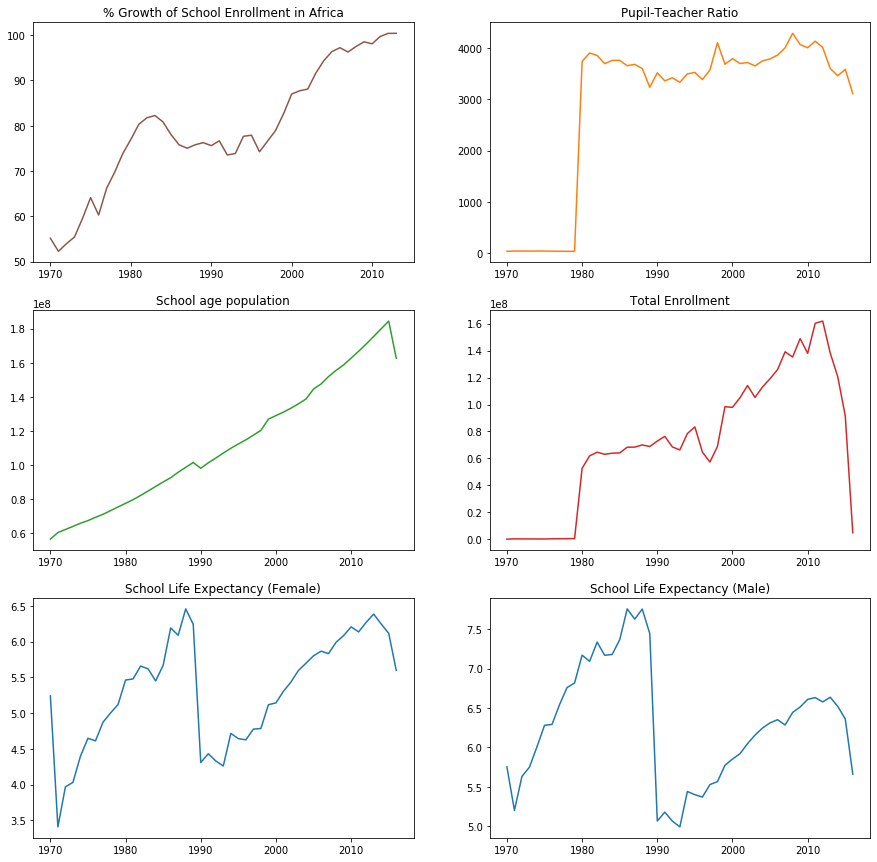

In [19]:
#Plots of chosen variables:

db_afr_indexes = db_zero[['Country','Year','Indicator','Value']]
db_afr_indexes = db_afr_indexes[db_afr_indexes.Country == 'AFR']


fig, axs = plt.subplots(3, 2,figsize=(15,15))

db_afr_ind_1 = db_afr_indexes[db_afr_indexes.Indicator == 'SE.PRM.ENRR']
axs[0, 0].plot(db_afr_ind_1.Year,db_afr_ind_1.Value, 'tab:brown')
axs[0, 0].set_title('% Growth of School Enrollment in Africa')

db_afr_ind_2 = db_afr_indexes[db_afr_indexes.Indicator == 'SE.PRM.ENRL.TC.ZS']
axs[0, 1].plot(db_afr_ind_2.Year,db_afr_ind_2.Value, 'tab:orange')
axs[0, 1].set_title('Pupil-Teacher Ratio')

db_afr_ind_3 = db_afr_indexes[db_afr_indexes.Indicator == 'SE.POP.PRM.NENR.TOT']
axs[1, 0].plot(db_afr_ind_3.Year,db_afr_ind_3.Value, 'tab:green')
axs[1, 0].set_title('School age population')

db_afr_ind_4 = db_afr_indexes[db_afr_indexes.Indicator == 'SE.PRM.ENRR.NUM.TO']
axs[1, 1].plot(db_afr_ind_4.Year,db_afr_ind_4.Value, 'tab:red')
axs[1, 1].set_title('Total Enrollment')

db_afr_ind_5 = db_afr_indexes[db_afr_indexes.Indicator == 'SE.YRS.SCHL.FE']
axs[2, 0].plot(db_afr_ind_5.Year,db_afr_ind_5.Value)
axs[2, 0].set_title('School Life Expectancy (Female)')

db_afr_ind_6 = db_afr_indexes[db_afr_indexes.Indicator == 'SE.YRS.SCHL.MA']
axs[2, 1].plot(db_afr_ind_6.Year,db_afr_ind_6.Value)
axs[2, 1].set_title('School Life Expectancy (Male)')

### Plot Analysis

The above plots show an overall increase in the education indicators across the whole continent:
* We see a continous increase in the growth of school enrollment in Africa, which is a promising trend.
* This observation is emphasized by the total enrollment of students, that jumped from 60 millions to 160 millions in just 20 years. In fact, among all the 180 million people within school age, 160 million are enrolled in schools.
* Although the the number of total number of pupils increased, the pupil-teacher ratio remained stable. This shows the investment of goverments to provide enough teachers for their young minds.

The plots shows that the data can still be cleaned and further processed. There is inconsistency in the overall values before 1980 and after 2015. This is mainly due to the fact that most countries were not stable enough to provide precise values for their indicators on one hand. On the other hand, after 2015 is a recent period of time and the stats are not published yet for most of the indicators.

Text(0, 0.5, 'Number of years')

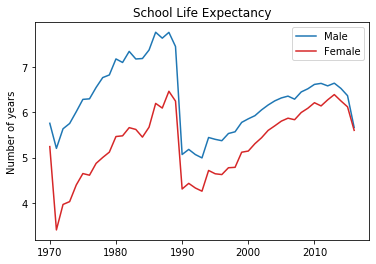

In [20]:
#For a better look in diff between the 2 genders
plt.plot(db_afr_ind_6.Year,db_afr_ind_6.Value,db_afr_ind_5.Year,db_afr_ind_5.Value,'tab:red')
plt.title('School Life Expectancy')
plt.legend(['Male','Female'])
plt.ylabel('Number of years')

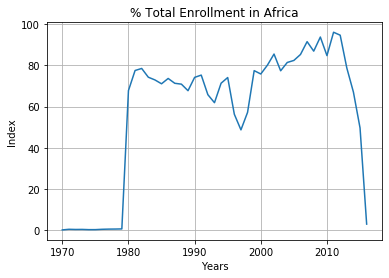

In [21]:
'''
Here we tried to look for a new attribute to see things better, the ratio of the enrolled people by the school aged people,
to look at the percentage of people going to school in Africa as a mean value, across the years.
'''

db_afr_ind_new = db_afr_indexes.copy()

nom_1 = db_afr_ind_new[db_afr_ind_new.Indicator == 'SE.PRM.ENRR.NUM.TO']

denom_1 = db_afr_ind_new[db_afr_ind_new.Indicator == 'SE.POP.PRM.NENR.TOT']

nom = nom_1['Value']
nom_f = nom.reset_index(drop=True)

denom = denom_1['Value']
denom_f = denom.reset_index(drop=True)

res = (nom_f/denom_f)*100

dates = range(1970,2017)

plt.plot(dates,res)
plt.xlabel('Years')
plt.ylabel('Index')
plt.title('% Total Enrollment in Africa')
plt.grid()
plt.show()

The big drop at the end is only due to unvailable data in recent years.. Information and Statistics may be not update
for many countries.

In [22]:
# Countries and regions Names?
db_zero.CountryName.unique()

array(['AFRICA', 'Central Africa', 'Cameroon', 'Central African Republic',
       'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea',
       'Gabon', 'Sao Tome and Principe', 'East Africa', 'Burundi',
       'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'World', 'AMU',
       'Kenya', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Sudan',
       'Tanzania', 'Uganda', 'North Africa', 'Algeria', 'Egypt', 'Libya',
       'Mauritania', 'Morocco', 'Tunisia', 'Southern Africa', 'Angola',
       'Botswana', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius',
       'Mozambique', 'Namibia', 'South Africa', 'Swaziland', 'Zambia',
       'Zimbabwe', 'West Africa', 'Benin', 'Burkina Faso', 'Cape Verde',
       "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone',
       'Togo', 'CAEMC', 'COMESA', 'ECCAS', 'ECOWAS', 'FRZONE', 'SADC',
       'WAEMU', 'Land Locked Countries', 'Mult. Dept Relief Initiative',

In [23]:
#From the list above, we see that multiple values are not needed (not only countries but also regions and set of countries
#that verify certain conditions are present)
#We will then eliminate this noisy data for these observations

location_afr = [9,18]
geo_data = os.path.join('./maps/', 'custom-afr-bibi.json')

chosen_year = 2010

Countries_Only = ['Cameroon', 'Central African Republic','Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea',
                 'Gabon', 'Sao Tome and Principe', 'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia','Kenya',
                 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Uganda', 'Algeria', 'Egypt',
                 'Libya', 'Mauritania', 'Morocco', 'Tunisia', 'Angola', 'Botswana', 'Lesotho', 'Madagascar', 'Malawi',
                 'Mauritius', 'Mozambique', 'Namibia', 'South Africa', 'Swaziland', 'Zambia', 'Zimbabwe', 'Benin',
                 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia',
                 'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone','Togo']

map_data = db_zero[['Country','CountryName','Year','Indicator','Value']].copy()

map_data = map_data[map_data.CountryName.isin(Countries_Only)]

map_data = map_data[map_data.Year == chosen_year]

map_data

,Country,CountryName,Year,Indicator,Value
51981,CMR,Cameroon,2010,FP.CPI.TOTL,1.288848e+02
52020,CMR,Cameroon,2010,FP.CPI.TOTL.ZG,1.279343e+00
52097,CMR,Cameroon,2010,GC.BAL.CASH.GD.CD,-3.229825e+08
52137,CMR,Cameroon,2010,GC.BAL.CASH.GD.ZS,-1.367266e+00
52197,CMR,Cameroon,2010,GC.REV.TOTL.GD.CD,3.850323e+09
...,...,...,...,...,...
2778702,GMB,Gambia,2010,DC.DAC.ODA.BIL.LUXL.CD,1.200000e+05
2778717,GMB,Gambia,2010,DC.DAC.NOF.BIL.LUXL.CD,1.200000e+05
2779406,GNB,Guinea-Bissau,2010,DC.DAC.ODA.BIL.AUSL.CD,1.600000e+05
2779418,GNB,Guinea-Bissau,2010,DC.DAC.NOF.BIL.AUSL.CD,1.600000e+05


### Here we will draw some maps to have a closer look at what these indexes values look like in each country,   for some specific year.

### We still haven't done the analysis for this part.

In [24]:
#1
map_data_1 = map_data[map_data.Indicator == 'SE.PRM.ENRR']

thresh = 105

def africa_colors_1(country):
    """Maps drachneya to drachneya etc.."""
    if not( map_data_1['Country'].str.contains(country).any()) : return '#00ff00'
    grrr = map_data_1.loc[map_data_1['Country'] == country,'Value'].values[0] > thresh
    if grrr :
        return '#0000ff'
    else:
        return '#ff0000'
    
    
m_afr_1 = folium.Map(location_afr, tiles='cartodbpositron', zoom_start=3)

folium.GeoJson(
    geo_data,
    style_function=lambda feature: {
        'fillColor': africa_colors_1(feature['id']),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_afr_1)

m_afr_1

In [25]:
m_afr_1 = folium.Map(location_afr, zoom_start=3)
m_afr_1.choropleth(geo_data=geo_data, data=map_data_1,
             columns=['Country', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='aw jek')

m_afr_1

In [26]:
#2
map_data_2 = map_data[map_data.Indicator == 'SE.PRM.ENRL.TC.ZS']

m_afr_2 = folium.Map(location_afr, zoom_start=3)
m_afr_2.choropleth(geo_data=geo_data, data=map_data_2,
             columns=['Country', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='aw jek')

m_afr_2

In [27]:
#3
map_data_3 = map_data[map_data.Indicator == 'SE.POP.PRM.NENR.TOT']

m_afr_3 = folium.Map(location_afr, zoom_start=3)
m_afr_3.choropleth(geo_data=geo_data, data=map_data_3,
             columns=['Country', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.4,
             legend_name='aw jek')

m_afr_3

In [28]:
#4
map_data_4 = map_data[map_data.Indicator == 'SE.PRM.ENRR.NUM.TO']

m_afr_4 = folium.Map(location_afr, zoom_start=3)
m_afr_4.choropleth(geo_data=geo_data, data=map_data_4,
             columns=['Country', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.4,
             legend_name='aw jek')

m_afr_4

In [29]:
#5
map_data_5 = map_data[map_data.Indicator == 'SE.YRS.SCHL.FE']

m_afr_5 = folium.Map(location_afr, zoom_start=3)
m_afr_5.choropleth(geo_data=geo_data, data=map_data_5,
             columns=['Country', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.4,
             legend_name='aw jek')

m_afr_5

In [30]:
#6
map_data_6 = map_data[map_data.Indicator == 'SE.YRS.SCHL.MA']

m_afr_6 = folium.Map(location_afr, zoom_start=3)
m_afr_6.choropleth(geo_data=geo_data, data=map_data_6,
             columns=['Country', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.4,
             legend_name='aw jek')

m_afr_6

### Socio-Economic Growth part

In [32]:
db_zero_pivot = pd.pivot_table(db_zero, values='Value', index=['Country', 'Year'], columns=['Indicator'])

In [33]:
development_indicators = ['SP.DYN.HDIV','SL.TLF.15UP.UEM','NY.GDP.PCAP.CD','FP.CPI.TOTL','CPI_S','SP.DYN.GIIV','SP.DYN.HPIV','SP.DYN.LE00.IN']
db_dev_inds = db_zero_pivot[development_indicators]

SP.DYN.HDIV				Human development index (HDI)
SL.TLF.15UP.UEM			Unemployment rate, (aged 15 over) (%)
NY.GDP.PCAP.CD			GDP per capita,(current US$)
FP.CPI.TOTL				Inflation, consumer prices  index (2000 = 100)
CPI_S					Corruption Perception Index, Overall Country Score
SP.DYN.GIIV				Gender Inequality Index, value (GII)
SP.DYN.HPIV				HUMAN POVERTY INDEX
SP.DYN.LE00.IN 			Life expectancy at birth, total (years)